# Tasks
***

These are my solutions to the Tasks assesment to be completed as part of my Emerging Technologies module. Author Keith Nolan.
Email: (g00351932@gmit.ie)

***

# Task 1


The first of these tasks is to write a Python function called sqrt2.
Thich calculates and prints to the screen the square root of 2 to 100 decimal places.
Below is my solution.


***

### Task: Calculate a sqaure root
***

The sqaure root of a number can be calculated using Newton's Method. [1]

To find the sqaure root $z$ of a number $x$, we can iterate using the following equation.

Add in how it works

$$ z' = z - \frac{z^2 - x}{2z} $$

[1] A tour of go. Exercise: Loops and Functions https://tour.golang.com/flowcontrol/8

In [10]:
def sqrt2(x):
    """ 
    function to calculate the sqaure root of 2 to 100 decimal places
    """
    #initial guess for the square root of z
    z = x / 2
    #loop until we're happy with the accuracy
    while abs(x -(z * z)) > 0.0001:
        #calculate a better guess for the square root
        z -= (z*z - x) / (2*z)
    #Return the approximate square root of 2
    
    return print("%.100f" % z)


#### Testing the above function

In [12]:
#Testing the above function
sqrt2(2)

1.4142156862745098866440685014822520315647125244140625000000000000000000000000000000000000000000000000


#### Testing the function on 2 using the math.sqrt function
Below the above function is being tested with some known values

In [17]:
import math
math.sqrt(2)

1.4142135623730951

***

# Task 2
Chi-squared test for independence
****


The goal of this task is: 
- to use scipy.stats to verify this value and calculate the associated p value.
***

The Chi-Square Test of Independence is a non-parametric test which determines whether the variables are independent or related. To analyse the data a cotingency table is used.
***

#### Cotingency table

A contingency table "(also known as a cross-tabulation, crosstab, or two-way table) is an arrangement in which data is classified according to two categorical variables. The categories for one variable appear in the rows, and the categories for the other variable appear in columns. Each variable must have two or more categories. Each cell reflects the total count of cases for a specific pair of categories."[1]
***
#### Hypotheses 
<b>H0</b> states that there is no association between the variables, that they are <b>independant</b> of eachother.
<b>H1</b> states that their is an association between them that they are <b>dependent</b> somehow.

#### Formula
The <b>formula for the Chi squared test</b> is shown below:

$$ x^2 = \sum \limits \frac {(O_i - E_i)^2} {E_i} $$

The formula is based on the <b>expected and the observed values</b> where the expected is the expected number of observations and the observed is the actual number of observations. 
To calculate the <b>p value</b>. The expected values must be greater than 5 and the sample size must not be greater than 10% of the population. If these condtions are met we take away the actual data point from the expected over the expected squared. We then repeat the same for all of the data points and expected values. We then add them all together. When this is done we get a <b>Chi value</b>.

We then must get our <b>degrees of freedom</b> which the (number of columns -1)(number of rows -1). So in a 3x3 table thsi would be (3-1)(3-1) = 4. Then the p value can be calculated. This is then compared to a significance level.
***


In [34]:
from scipy.stats import chi2_contingency
#table of observed frequencies
obs =[[90, 60, 104, 95], [30, 50, 51, 20],[30, 40, 45, 35]]
'''
p - The p-value of the test.
e -  Chi-squared value 
dof - Degrees of freedom.
expected - The expected frequencies, based on the marginal sums of the table.
'''
g, p, dof, expctd = chi2_contingency(obs)


#printing results
print("********")
print("Expected values: ")
print(expctd)
print("********")
print("Chi-squared value:")
print(g)
print("********")
print("Degree of freedom: ")
print(dof)
print("********")
print("P value: ")
print(p)
print("********")


********
Expected values: 
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]
********
Chi-squared value:
24.5712028585826
********
Degree of freedom: 
6
********
P value: 
0.0004098425861096696
********


***
### References used for task 2
***
[1] Chi-Squared test of indepenence: https://libguides.library.kent.edu/spss/chisquare
***
[2] Chi-square test for association (independence): https://www.khanacademy.org/math/ap-statistics/chi-square-tests/chi-square-tests-two-way-tables/v/chi-square-test-association-independence
***
[3] Chi squared test wiki: https://en.wikipedia.org/wiki/Chi-squared_test
***
[4] scipy.stats.chi2_contingency: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

***

****

# Task 3
Standard deviation

*****

The goals of this task are:
- to research the Excel functions STDDEV.P and STDDEV.S and explain their differences
- use numpy to perform a simulation demonstrating that the STDDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.

#### STDDEV.P
<b>STDDEV.P</b> is used to calculate the standard deviation of a whole population. The p in STDDEV stands for population. For example if you had a set of data that contains all of the members of some specified group. A population could be <b>ALL</b> of the people studying in your college. 

The formula we use for <b> standard deviation for a population</b> is:

$$ \sigma x = \sqrt \frac {1}{n} \sum \limits_{i=1}  ^{n} ( x_i - \bar x )^2$$
***

<b>Mean absolute deviation</b>
The mean absolute deviation of a dataset is the average distance between each data point and the mean.

Below is the formula to calculate the <b>Mean Absolute Variance of a Population</b>

$$Population (MAD)= \frac{1}{n} \sum \limits_{i=1}  ^{n}| x_i - \bar x $$
***
#### STDDEV.S
<b>STDDEV.S</b> is used when you have a sample of a dataset such as a sample of a population. For example if you wanted to find some of the students in your college who identify as female. This would be used to generalise this dample to the entire popuation. The sample will then be used as an estimate of the entire population.

The formula we use for standard deviation on a <b>sample of a population</b> is:
$$ S x = \sqrt \frac {1}{n -1} \sum \limits_{i=1}  ^{n} ( x_i - \bar x )^2$$


Below is the equation to calculate the <b>Mean Absolute Variance of a sample of a Population</b>

$$Sample (MAD)= \frac{1}{n -1} \sum \limits_{i=1}  ^{n}| x_i - \bar x $$
***



In [40]:
import numpy as np
#defining array 
# [5]
x = np.array([[17, 200], [123, 443]])
#STDDEV.P function
a = np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
#STDDEV.S function
b = np.sqrt(np.sum((x - np.mean(x))**2)/len(x)-1)
#printing results
print(a)
print(b)

221.80481284228256
221.80255859660411


##### STDDEV.S is a better estimate for the STDDEV of a population when performed on a sample.
When working with a sample of the entire population dividing by n-1 as opposed to just n gives a slightly different outcome. In turn this gives a better mathematical estimate of the population.

"Think of dividing by n - 1 (instead of n) in the sample as a means of "compensating" for the fact that we are working with a sample of the population, rather than with the entire population. It statistically gives the best estimate." [4]




***

***
### References used for task 3
***
[1] Writing Matimatical Formulas in Markdown: https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/
***
[2] Explanation for Mean Absolute Devation: https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/other-measures-of-spread/a/mean-absolute-deviation-mad-review
***
[3] Population and sample deviation review: https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review
***
[4] Population vs Sample data: http://mathbitsnotebook.com/Algebra1/StatisticsData/STPopSample.html
***
[5] numpy.std: https://numpy.org/doc/stable/reference/generated/numpy.std.html

***
# Task 4
***
k-means clustering to Fisher’s famous Iris data set.
***
 

In [3]:
# Imports
#Import datasets from skLearn
from sklearn import datasets
#Import matplotlib.pyplot
import matplotlib.pyplot as plt
#Import panda
import pandas as pd
#Import KMeans
from sklearn.cluster import KMeans


In [4]:
# Loading the dataset
iris = datasets.load_iris()


In [5]:
# Defining the target and predictors.
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

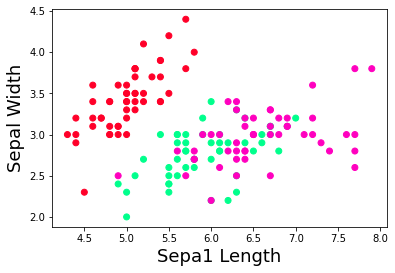

In [23]:
#Visualising data through a scatter plot
'''
A scatter plot of y vs. x with varying marker size and/or color.[5]

X[:,0], X[:,1]: Positions for the data

cmap: A Colormap instance or registered colormap name. [5]

c: array-like or list of colors or color, optional.[5]

xlabel: The label text on x axis and size of font[6]
ylabel: The label text on y axis and size of font[6]

'''
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepa1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [8]:
#  instantiate K means cluster model. 
# Comprises of three clusters and a random state of 21.
'''
random_state: Determines random number generation for centroid initialization. 
int used to make the randomness deterministic[4].

n_clusters: The number of clusters to form as well as the number of centroids to generate. [4]

n_jobs: The number of OpenMP threads to use for the computation. 
Parallelism is sample-wise on the main cython loop which assigns each sample to its closest center.[4]

'''
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
'''
Compute k-means clustering [4]
'''
km.fit(X)

/Users/keithnolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=4, random_state=21)

In [9]:
# Identifying the centre points of the data
'''
cluster_centers_: Coordinates of cluster centers. [4]
'''
centers = km.cluster_centers_

#printing the centre values
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


Text(0.5, 1.0, 'Predicted')

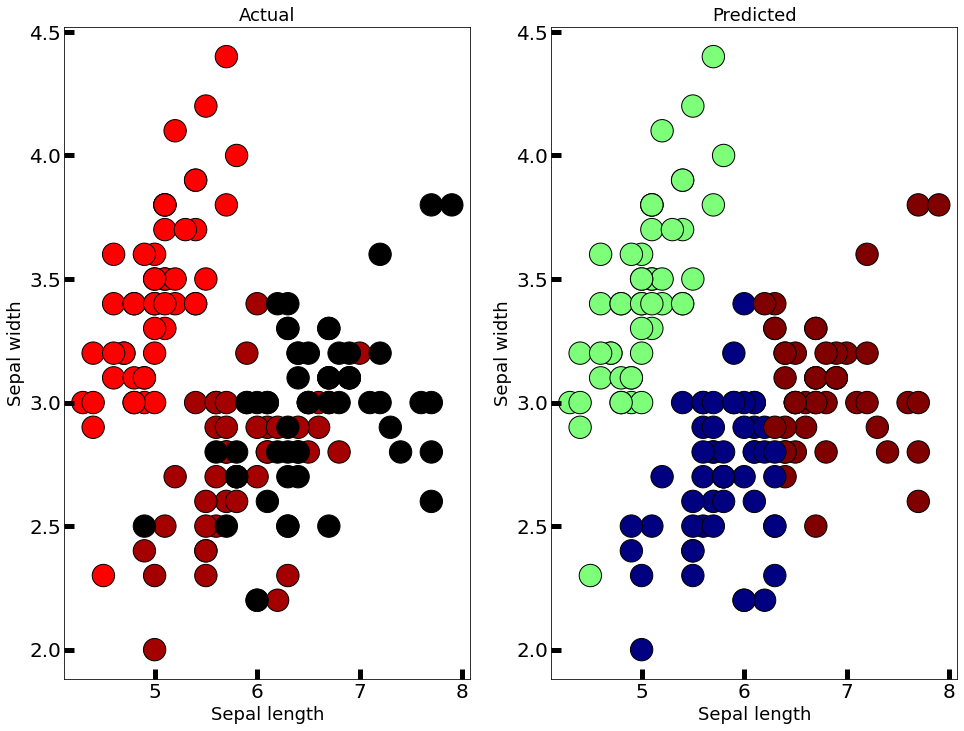

In [33]:
# Which cluster does the data observations belong.
'''
labels_: Labels of each point [4]
'''
labels = km.labels_
# Plot the identified clusters and compare with the answers
'''
fig: Figure [7]
axes: array of Axes [7]

numrows = 1 [7]
num cols = 2 [7]
figsize: size of images [7]

'''
fig, axes = plt.subplots(1, 2, figsize=(16,12))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='flag',edgecolor='k', s=500)
axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='jet',edgecolor='k', s=500)
#Font Sizes and headings for each axis
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
# Title for each plot
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


***
### How the code Works
***

- Firstly the required libraries are imported.
<br />

- The dataset is then loaded which is declared as <b>iris = datasets.load_iris()</b>.
This loads and returns the iris dataset from datasets [1]
<br />

- The target and predictors of the dataset are then established <b>X = iris.data[:, :2]
 Y = iris.target</b>
 <br />
 
- A scatter plot is then created to visualise data using. This displays the width and length of the speal. To achieve this these fuctions from the matplotlib.pyplot<b> plt.scatter, plt.xlabel, plt.ylabel</b> [5]
<br />

- With the plot visible the K means cluster model is instantiated. K means is defined with 3 clusters, and a random state of 21. This means there will be 3 groups of clusters made one for each of these flower types.[4] n_jobs is used  for the numnber of OpenMP threads to use for the computation.[4] Random state sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time. [8] The cluster is then computed.

<br />

- The labels are then defined of each point 
<br />

- An array of axes is then defined as there will be 2 subplots predicited and actual. Both are Initialised with 1 row and 2 columns an size of the figures is set.
<br />

X[:,0], X[:,1]: Positions for the data

cmap: A Colormap instance or registered colormap name. [5]

c: array-like or list of colors or color, optional.[5]

xlabel: The label text on x axis and size of font[6]
ylabel: The label text on y axis and size of font[6]


- axes[0] is then defined with the scatter method [5] the positions are set for the data, colors are set for the points a well as an edgecolor which defines the colour of the edge of the points. Each point has a size of 500[5].
<br />

- axes[1] is then defined with the scatter method [5] the positions are set for the data, colors are set for the points a well as an edgecolor which defines the colour of the edge of the points. Each point has a size of 500 [5].












***
### References used for task 4
***

[1] <b>sklearn.datasets.load_iris</b>
<br />
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

[2] <b>Choosing Colormaps in Matplotlib</b>
<br />
https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html
<br />

[3] <b>PREDICTING IRIS FLOWER SPECIES WITH K-MEANS CLUSTERING IN PYTHON</b> 
<br />
https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
<br />

[4]<b> sklearn.cluster.KMeans</b> 
<br />
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
<br />

[5]<b> matplotlib.pyplot.scatter</b> 
<br />
https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html

[6] <b> matplotlib.pyplot</b> 
<br />
https://matplotlib.org/3.1.1/api/pyplot_summary.html

[7] <b> matplotlib.pyplot.subplots</b> 
<br />
https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html

[8] <b>Whats is random_state</b> 
<br />
https://stackoverflow.com/questions/49147774/what-is-random-state-in-sklearn-model-selection-train-test-split-example?rq=1
<br />